In [24]:
import keras
from tkinter import *
import PIL
from PIL import Image, ImageDraw

In [2]:
model = keras.models.load_model("katakana-model.h5")

In [63]:
def save():
    global image_number
    filename = f'image_{image_number}.png'   #image_number increments by 1 at every save
    image1.save(filename)
    image_number += 1



def activate_paint(e):
    global lastx, lasty
    cv.bind('<B1-Motion>', paint)
    lastx, lasty = e.x, e.y
def paint(e):
    global lastx, lasty
    x, y = e.x, e.y
    cv.create_line((lastx, lasty, x, y), fill = "white", width=10)
    #  --- PIL
    draw.line((lastx, lasty, x, y), fill='white', width=10)
    lastx, lasty = x, y


root = Tk()

lastx, lasty = None, None
image_number = 0

cv = Canvas(root, width=480, height=480, bg='black')
# --- PIL
image1 = PIL.Image.new('RGB', (480, 480), 'black')
draw = ImageDraw.Draw(image1)

cv.bind('<1>', activate_paint)
cv.pack(expand=YES, fill=BOTH)

btn_save = Button(text="save", command=save)
btn_save.pack()

root.mainloop()


In [4]:
try:
    from PIL import Image
except ImportError:
    import Image

In [5]:
try:
    from PIL import ImageOps
except ImportError:
    import ImageOps

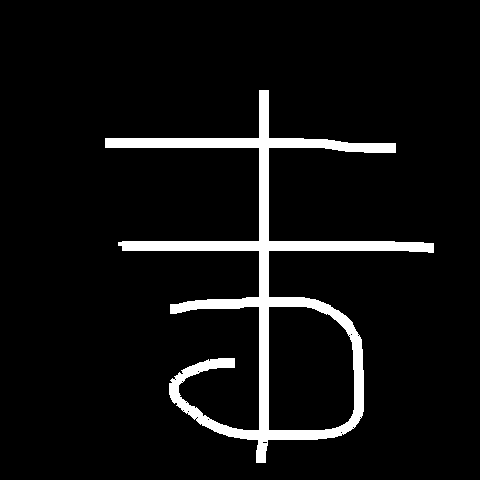

In [65]:
im = Image.open(r'image_0.png')
im


In [61]:
dict_module_1 = {28 : 'he', 26 : 'to', 29 : 'ma', 34 : 'mo'}

In [64]:
import numpy as np
im = Image.open(r'image_0.png')
im = ImageOps.grayscale(im)
size = (48,48)
im.thumbnail(size,Image.ANTIALIAS)
final = np.array(im)
x = np.expand_dims(final,0) # adding a dimension to the input to fit into the 

y = model.predict(x)
print('given character is :',dict_module_1[y.argmax()])
try :
    print('character you drew is correct')
except KeyError :
    print('Try again')


given character is : ma
character you drew is correct
